In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

## Data Loading

In [15]:
path='/kaggle/input/test-file/tested.csv'
df=pd.read_csv(path)

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Data Preprocessing

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [18]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [19]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,2


In [38]:
df.duplicated().sum()

0

## Data Cleaning

In [20]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
df['Age'].fillna(df['Age'].median(),inplace = True)

/tmp/ipykernel_30/1750550615.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace = True)


In [22]:
df = df.drop('Cabin', axis=1)

In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,1
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,2


## EDA

**Outliers Handling** 

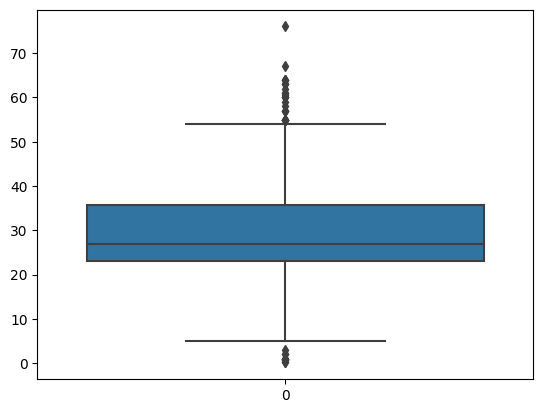

In [41]:
sns.boxplot(df['Age'])
plt.show()  # Show the plot for Age


In [48]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)

IQR=Q3-Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,2
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,2
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,0
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,2


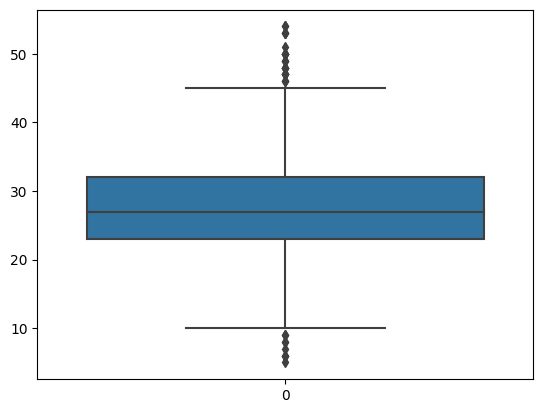

In [49]:
sns.boxplot(df['Age'])
plt.show()  # Show the plot for Age

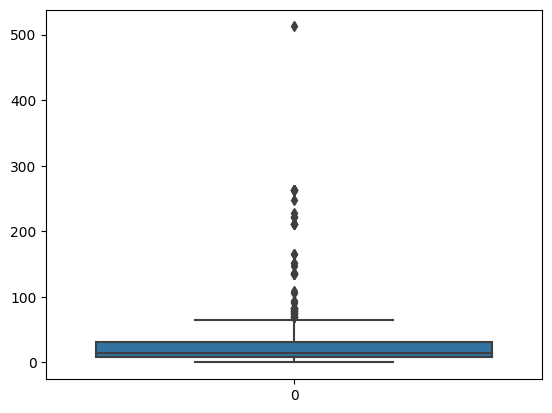

In [42]:
# Boxplot for 'Fare'
sns.boxplot(df['Fare'])
plt.show()  # Show the plot for Fare

In [52]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

IQR=Q3-Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df= df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,2
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,2
5,897,0,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,2
...,...,...,...,...,...,...,...,...,...,...,...
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",1,28.0,0,0,347086,7.7750,2
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,2
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,2
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,2


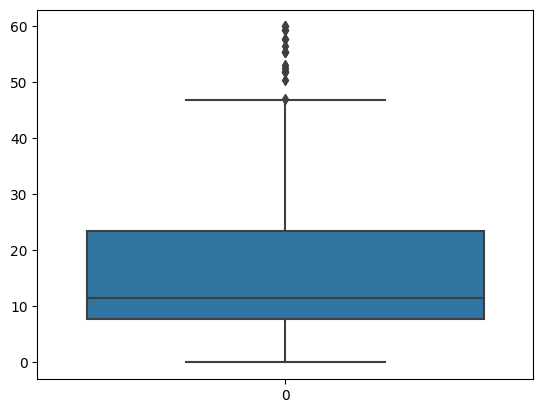

In [51]:
# Boxplot for 'Fare'
sns.boxplot(df['Fare'])
plt.show()  # Show the plot for Fare

In [39]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked         int64
dtype: object

## Data Visualization

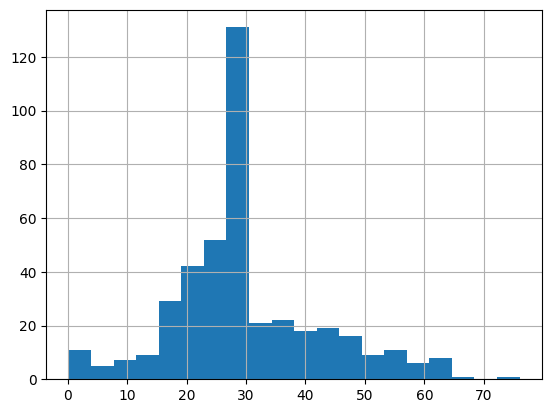

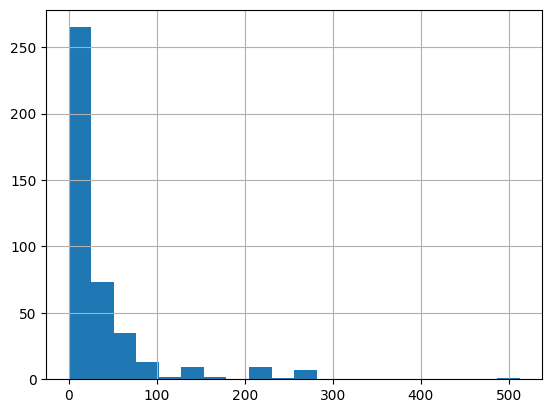

In [40]:
df['Age'].hist(bins=20)
plt.show()

df['Fare'].hist(bins=20)
plt.show()

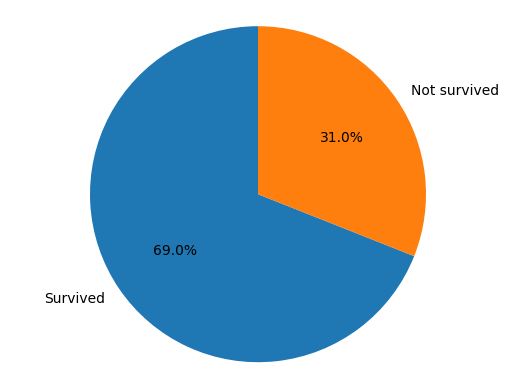

In [66]:
# Count the values of 'Survived'
Survived = df['Survived'].value_counts()

# Map the values to 'Male' and 'Female'
labels = Survived.index.map({0: 'Survived', 1: 'Not survived'})

# Create a pie chart
plt.pie(Survived, labels=labels, autopct='%1.1f%%', startangle=90)

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.show()

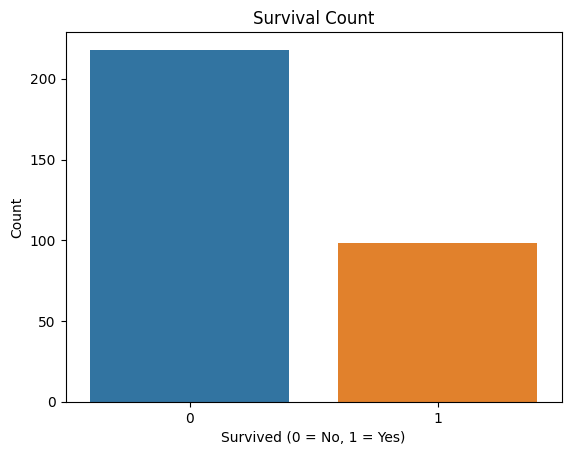

In [70]:
# Bar chart of survival counts
sns.countplot(x='Survived', data=df)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

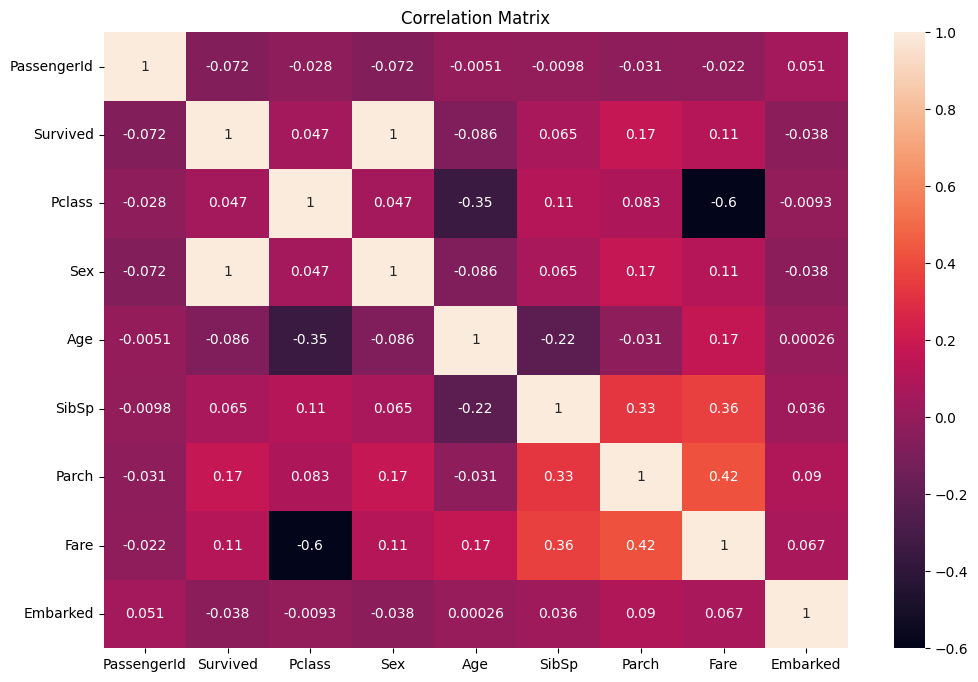

In [71]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

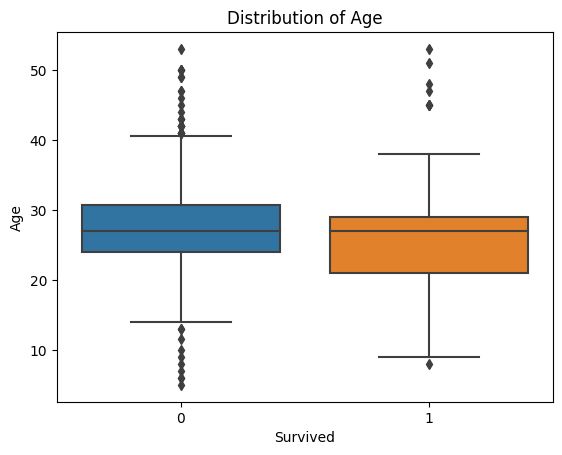

In [73]:
sns.boxplot(data=df,x='Survived',y='Age')
plt.title('Distribution of Age')
plt.show()

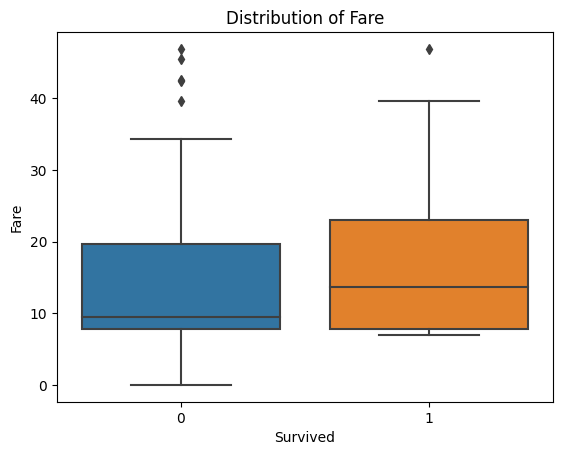

In [74]:
sns.boxplot(data=df,x='Survived',y='Fare')
plt.title('Distribution of Fare')
plt.show()

## Splitting The Data¶


In [77]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
x=df[features]

y=df['Survived']

0      0
1      1
3      0
4      1
5      0
      ..
412    1
413    0
415    0
416    0
417    0
Name: Survived, Length: 316, dtype: int64

In [80]:
print(f'The shape of x is :{x.shape}')
print(f'The shape of y is :{y.shape}')

The shape of x is :(316, 6)
The shape of y is :(316,)


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=45 )

## Build and Train the Logistic Regression Model


In [108]:
logReg = LogisticRegression(max_iter=1000)

In [109]:
logReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

## Evaluate the Model 1

In [102]:
y_pred1 = logReg.predict(x_test)

In [110]:
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[56  0]
 [ 0 23]]


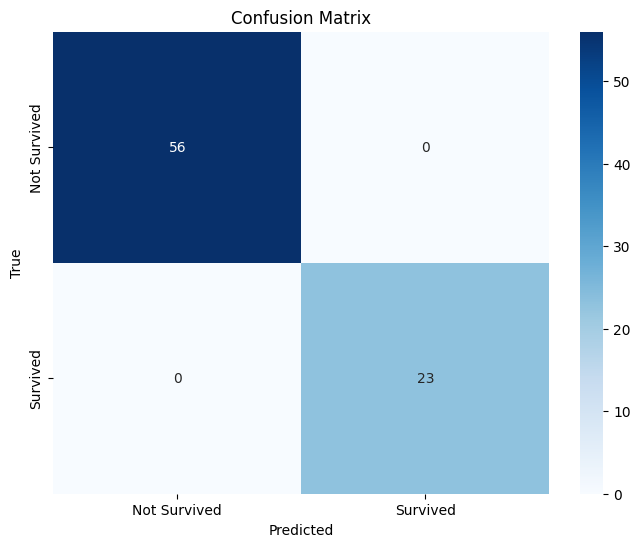

In [111]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [112]:
print("The Classification report is :")
print(classification_report(y_test,y_pred1))

The Classification report is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        23

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



## Build and Train the DecisionTreeClassifier Model

In [113]:
dt = DecisionTreeClassifier(max_depth=2)

In [114]:
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

## Evaluate the Model 2

In [115]:
y_pred2 = dt.predict(x_test)

In [116]:
accuracy = accuracy_score(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 100.00%
Confusion Matrix:
[[56  0]
 [ 0 23]]


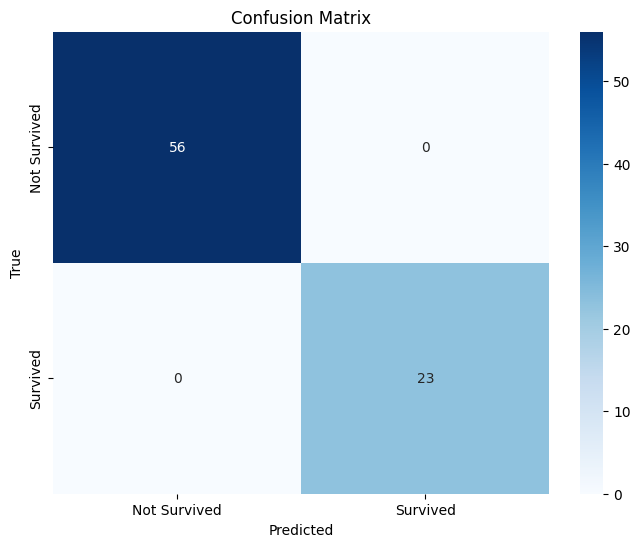

In [117]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [118]:
print("The Classification report is :")
print(classification_report(y_test,y_pred2))

The Classification report is :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        23

    accuracy                           1.00        79
   macro avg       1.00      1.00      1.00        79
weighted avg       1.00      1.00      1.00        79



## Build and Train the SVC Model

In [120]:
svc=SVC()

In [121]:
svc.fit(x_train,y_train)

SVC()

## Evaluate the Model 3

In [122]:
y_pred3 = svc.predict(x_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 70.89%
Confusion Matrix:
[[56  0]
 [23  0]]


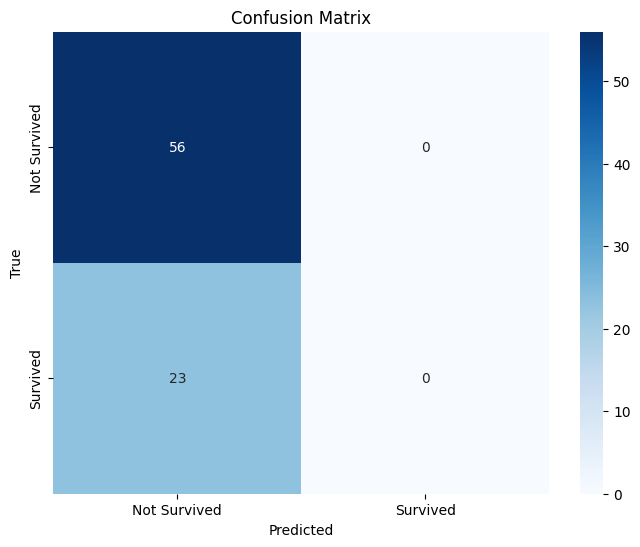

In [124]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [125]:
print("The Classification report is :")
print(classification_report(y_test,y_pred3))

The Classification report is :
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        56
           1       0.00      0.00      0.00        23

    accuracy                           0.71        79
   macro avg       0.35      0.50      0.41        79
weighted avg       0.50      0.71      0.59        79



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Build and Train the KNClassifier Model

In [126]:
knc=KNeighborsClassifier()

In [129]:
knc.fit(x_train,y_train)

KNeighborsClassifier()

## Evaluate the Model 4

In [130]:
y_pred4 = knc.predict(x_test)

In [131]:
accuracy = accuracy_score(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 72.15%
Confusion Matrix:
[[47  9]
 [13 10]]


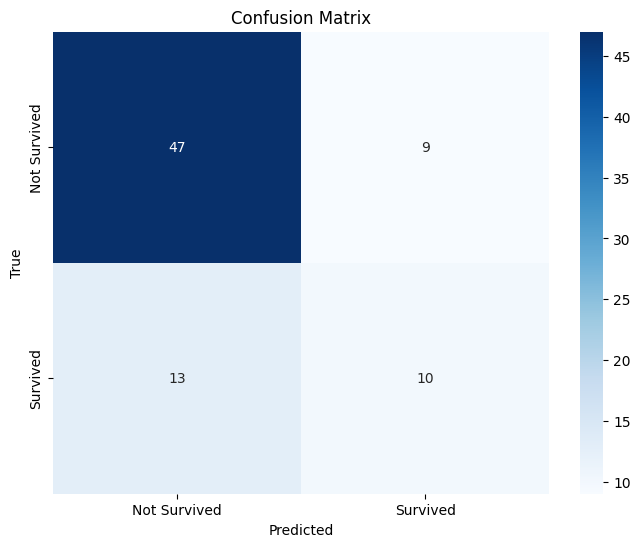

In [132]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Survived', 'Survived'], 
            yticklabels=['Not Survived', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [133]:
print("The Classification report is :")
print(classification_report(y_test,y_pred4))

The Classification report is :
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        56
           1       0.53      0.43      0.48        23

    accuracy                           0.72        79
   macro avg       0.65      0.64      0.64        79
weighted avg       0.71      0.72      0.71        79

